In [58]:
import numpy as np
import pandas as pd

# 시각화 모듈
import matplotlib.pyplot as plt
import seaborn as sns

# 모듈
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
# train_test_split 모듈
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 평가 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 로드 및 전처리

In [59]:
btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snpe.csv')

In [60]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1432 non-null   object 
 1   Price     1432 non-null   float64
 2   Open      1432 non-null   float64
 3   High      1432 non-null   float64
 4   Low       1432 non-null   float64
 5   Vol.      1402 non-null   object 
 6   Change %  1432 non-null   object 
dtypes: float64(4), object(3)
memory usage: 78.4+ KB


In [61]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4665 non-null   object
 1   Price     4665 non-null   object
 2   Open      4665 non-null   object
 3   High      4665 non-null   object
 4   Low       4665 non-null   object
 5   Vol.      4069 non-null   object
 6   Change %  4665 non-null   object
dtypes: object(7)
memory usage: 255.2+ KB


In [62]:
def clean_and_convert(df):
    for col in df.columns:
        if col != 'Date':
            # Object 타입을 각각의 맞는 타입으로 변경
            if df[col].dtype == 'O':

                # 숫자와 문자로 이루어져 있어 해당 데이터를 숫자로 변경하기 위한 작업
                if col == 'Vol.':
                    df[col] = df[col].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
                    df[col] = df[col].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)
                
                elif col == 'Change %':
                    df[col] = df[col].str.replace('%', '', regex=True) 
                    
                df[col] = df[col].astype(str)
                df[col] = df[col].str.replace(',', '', regex=True) 
            
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [63]:
btc_df = clean_and_convert(btc_df)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4665 non-null   object 
 1   Price     4665 non-null   float64
 2   Open      4665 non-null   float64
 3   High      4665 non-null   float64
 4   Low       4665 non-null   float64
 5   Vol.      4069 non-null   float64
 6   Change %  4665 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.2+ KB


In [64]:
# UTC 시간대 통일
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce', utc=True)
btc_df['Date'] = pd.to_datetime(btc_df['Date'], errors='coerce', utc=True)

# 시간대 제거
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce').dt.tz_localize(None)
btc_df['Date'] = pd.to_datetime(btc_df['Date'], errors='coerce').dt.tz_localize(None)


In [65]:
btc_df['Price'] = (btc_df['High'] + btc_df['Low']) / 2
snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

In [66]:
snp_df.describe()

,Date,Price,Open,High,Low
count,1432,1432.000000,1432.000000,1432.000000,1432.000000
mean,2022-03-28 14:00:40.223463680,37.168062,37.185223,37.372528,36.963596
min,2019-06-27 00:00:00,19.680000,20.070000,20.070000,19.290000
25%,2020-10-21 18:00:00,30.931250,30.957500,31.077500,30.705000
50%,2022-03-17 12:00:00,37.127500,37.080000,37.315000,36.890000
75%,2023-08-21 06:00:00,41.373750,41.400000,41.570000,41.205000
max,2025-01-24 00:00:00,55.510000,55.580000,55.620000,55.420000
std,NaN,8.043954,8.046569,8.061386,8.028919


In [67]:
btc_df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4665,4665.000000,4665.000000,4665.000000,4665.000000,4069.000000,4665.000000
mean,2018-08-28 03:08:36.270096384,16135.995723,16141.718950,16508.115520,15763.875927,13484.025559,0.295576
min,2012-04-06 00:00:00,4.700000,4.700000,4.700000,4.700000,0.000000,-38.180000
25%,2015-06-18 00:00:00,438.050000,439.000000,446.500000,430.500000,1790.000000,-1.260000
50%,2018-08-29 00:00:00,6606.350000,6627.300000,6778.300000,6511.500000,6010.000000,0.110000
75%,2021-11-07 00:00:00,26491.500000,26365.000000,26804.000000,26018.000000,16370.000000,1.800000
max,2025-01-16 00:00:00,106620.000000,106000.000000,108080.000000,105160.000000,274850.000000,36.150000
std,NaN,21754.264747,21760.281382,22224.553365,21290.305761,20144.169481,4.076950


In [68]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.date
snp_df['Date'] = pd.to_datetime(snp_df['Date']).dt.date

In [69]:
# 겹치는 날짜 범위 확인
snp_start, snp_end = snp_df['Date'].min(), snp_df['Date'].max()
btc_start, btc_end = btc_df['Date'].min(), btc_df['Date'].max()

# 공통 날짜 범위 설정
common_start = max(snp_start, btc_start)
common_end = min(snp_end, btc_end)

print(f"공통 날짜 범위: {common_start} ~ {common_end}")


공통 날짜 범위: 2019-06-27 ~ 2025-01-16


In [70]:
common_dates = pd.merge(
    snp_df[['Date', 'Price']], 
    btc_df[['Date', 'Price']], 
    on='Date', 
    suffixes=('_snp', '_btc')
)

# 병합 결과 확인
print(common_dates.head())
print(f"공통 데이터 개수: {len(common_dates)}")

         Date  Price_snp  Price_btc
0  2025-01-16     53.745    99962.0
1  2025-01-15     53.720    98662.0
2  2025-01-14     52.835    95971.5
3  2025-01-13     52.490    92953.0
4  2025-01-10     52.905    94152.0
공통 데이터 개수: 1427


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델 성능 평가 모델
def evaluate_model(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{label} Prediction Metrics:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print()

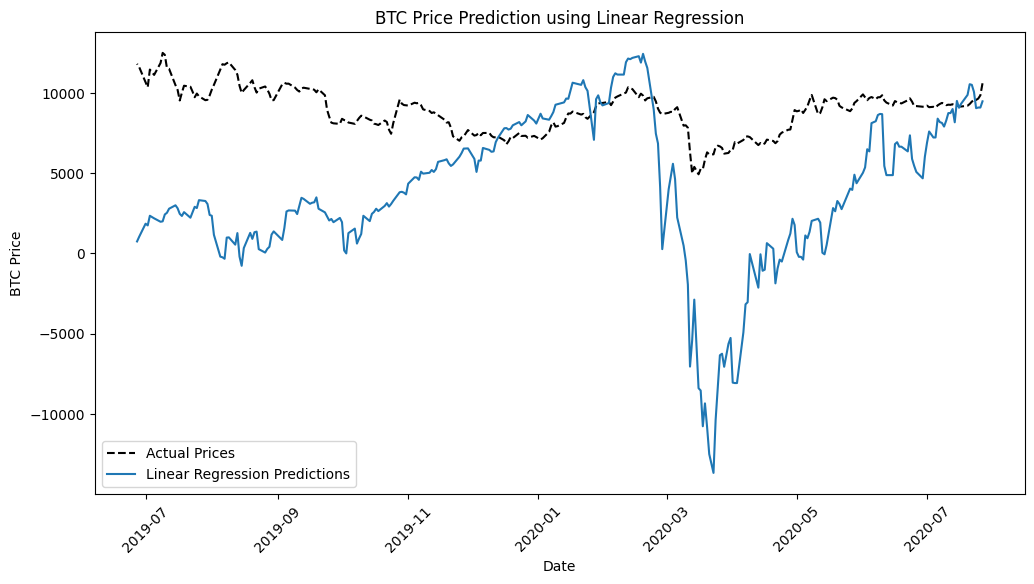

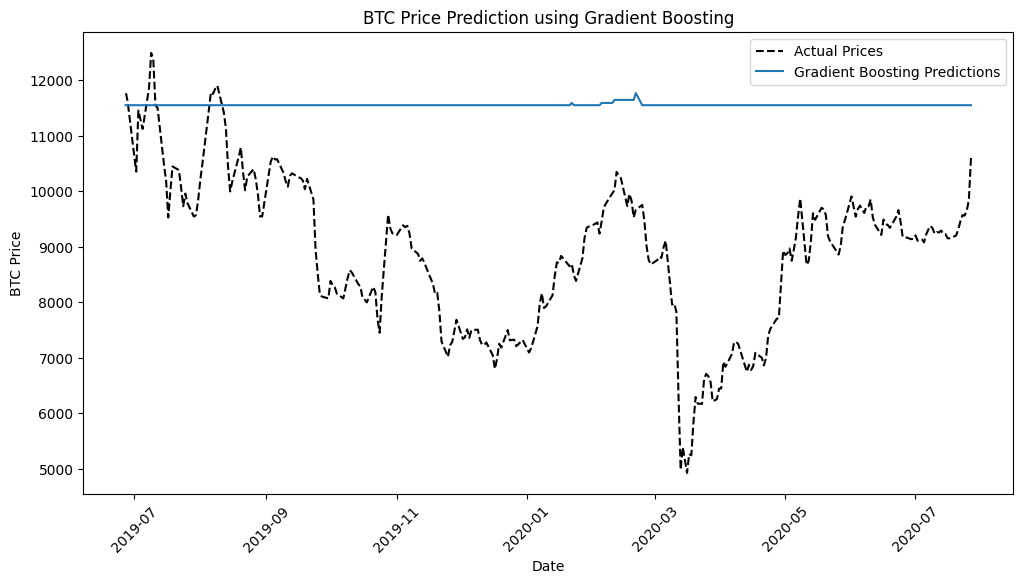

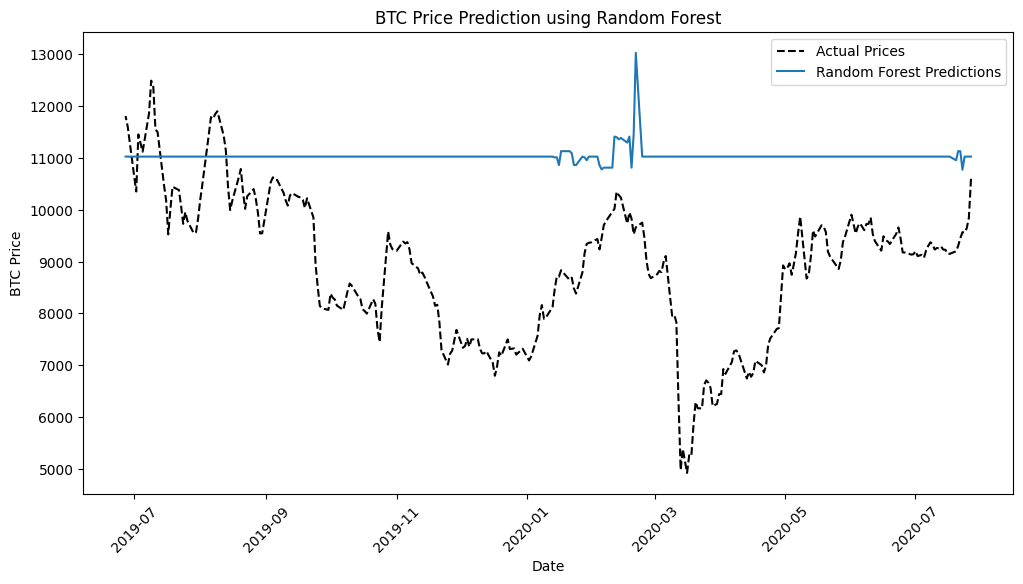

In [72]:
# 특성 확장: 다양한 변수 추가
features = ['Price_snp']  # 필요시 추가할 수 있음
X = common_dates[features]
y = common_dates['Price_btc']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y, common_dates['Date'], test_size=0.2, random_state=42, shuffle=False
)

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        results[name] = {'model': model, 'mse': mse, 'mae': mae, 'r2': r2, 'predictions': predictions}
    
    return results

def plot_predictions_with_time(results, X_test, y_test, dates):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(dates, y_test, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(dates, res['predictions'], label=f'{name} Predictions')
        plt.xlabel('Date')
        plt.ylabel('BTC Price')
        plt.title(f'BTC Price Prediction using {name}')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

# 모델 설정 (하이퍼파라미터 조정)
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

# 모델 학습 및 평가
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# 예측 시각화
plot_predictions_with_time(results, X_test, y_test, dates_test)


## 예측 결과가 좋지 않은 이유
- 입력 특성(Feature)의 부족
    - 현재 모델에서는 단일 변수(Price_snp)만을 이용하여 Price_btc를 예측하려고 합니다.
    - 그러나 BTC 가격은 S&P 500의 가격뿐만 아니라 다양한 요인(거래량, 변동성, 시장 심리, 경제 지표 등)에 영향을 받습니다.
- BTC와의 상관관계가 명확하지 않을 경우 예측력이 떨어질 수 있습니다.
- 대신 과거 여러 일의 데이터를 활용하여 다음 날을 예측하는 시계열 예측 방법이 필요할 수 있습니다.

### 개선 시도 1

Model: Linear Regression
Mean Squared Error: 0.17
R^2 Score: 0.99

Model: Gradient Boosting
Mean Squared Error: 61.57
R^2 Score: -3.75

Model: Random Forest
Mean Squared Error: 59.49
R^2 Score: -3.59



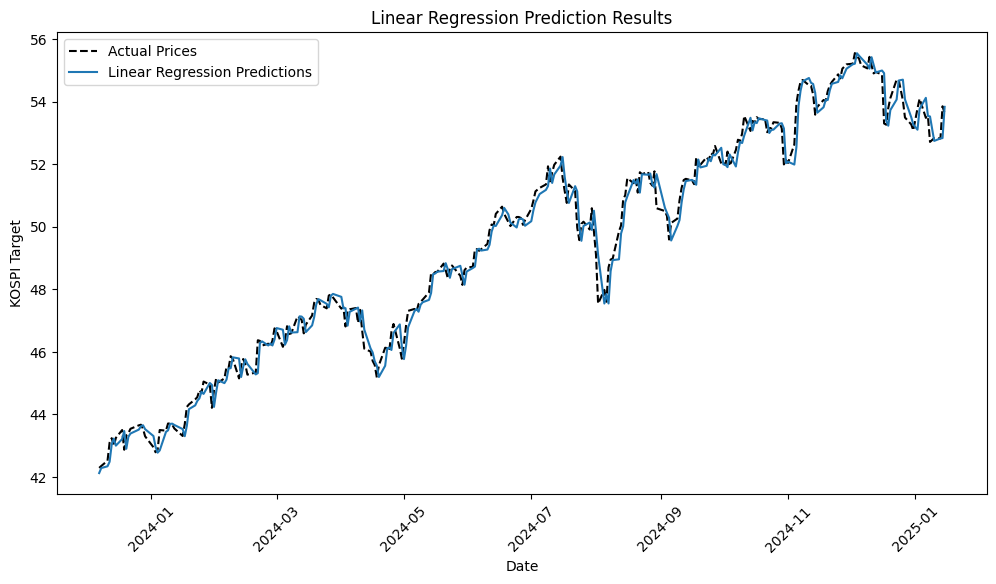

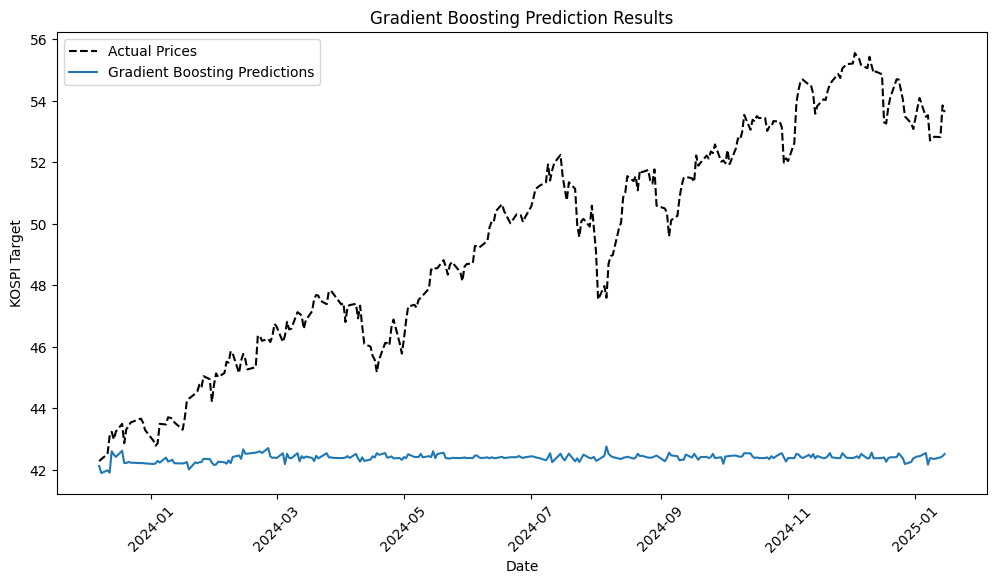

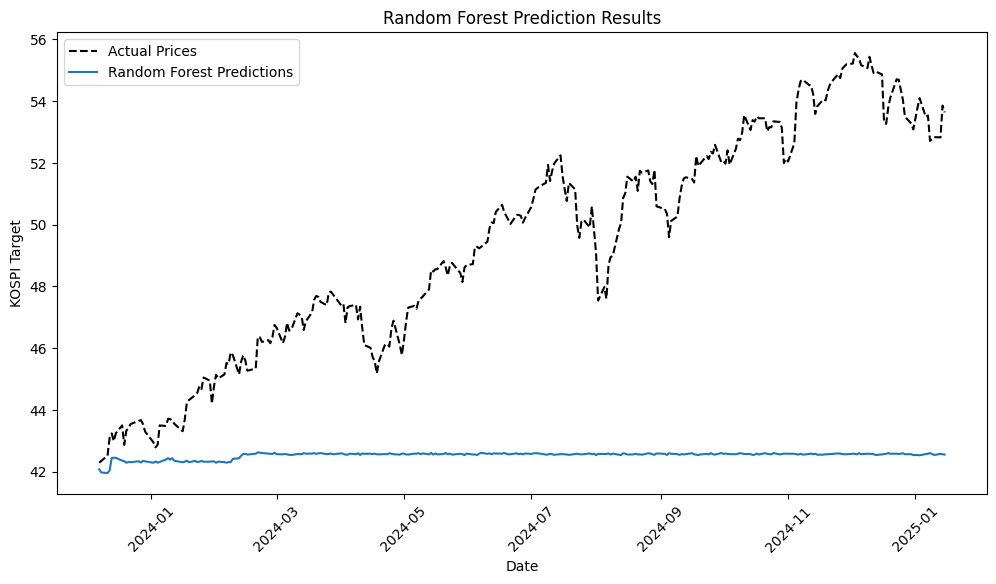

In [73]:
btc_data = pd.read_csv('./data/btc_usd.csv')
kospi_data = pd.read_csv('./data/snpe.csv')


# 데이터 전처리 함수
def preprocess_data(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[price_column] = df[price_column].replace(',', '', regex=True).astype(float)
    df = df.sort_values(date_column)
    df.dropna(subset=[date_column, price_column], inplace=True)
    df['Change'] = df[price_column].pct_change()
    df['MA7'] = df[price_column].rolling(window=7).mean()
    df['MA14'] = df[price_column].rolling(window=14).mean()
    df.dropna(inplace=True)
    return df

# 데이터 전처리
btc_data = preprocess_data(btc_data, 'Date', 'Price')
kospi_data = preprocess_data(kospi_data, 'Date', 'Price')

btc_data = btc_data[['Date', 'Price', 'Change', 'MA7', 'MA14']].rename(columns={'Price': 'Bitcoin'})
kospi_data = kospi_data[['Date', 'Price', 'Change', 'MA7', 'MA14']].rename(columns={'Price': 'KOSPI'})

# 병합 및 타겟 생성
merged_data = pd.merge(btc_data, kospi_data, on='Date', how='inner')
merged_data['Target'] = merged_data['KOSPI'].shift(-1)
merged_data.dropna(inplace=True)

# 특성 선택
features = ['Bitcoin', 'KOSPI', 'Change_x', 'MA7_x', 'MA14_x', 'Change_y', 'MA7_y', 'MA14_y']
X = merged_data[features]
y = merged_data['Target']

# 학습/테스트 분할
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, merged_data['Date'], test_size=0.2, random_state=42, shuffle=False
)

# 선형 회귀 모델을 위한 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 설정
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    X_train_used = X_train_scaled if name == 'Linear Regression' else X_train
    X_test_used = X_test_scaled if name == 'Linear Regression' else X_test
    
    model.fit(X_train_used, y_train)
    predictions = model.predict(X_test_used)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'model': model, 'predictions': predictions, 'mse': mse, 'r2': r2}

# 시각화 함수
def plot_predictions_with_time(results, dates, y_test):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(dates, y_test, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(dates, res['predictions'], label=f'{name} Predictions')
        plt.title(f'{name} Prediction Results')
        plt.xlabel('Date')
        plt.ylabel('KOSPI Target')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

# 예측 결과 출력 및 시각화
for name, res in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {res['mse']:.2f}")
    print(f"R^2 Score: {res['r2']:.2f}\n")

plot_predictions_with_time(results, dates_test, y_test)


### R^2 SCORE가 음수인 두 모듈(GradientBoostingRegressor, RandomForestRegressor)의 개선 방법 찾아보기

Model: Gradient Boosting
Mean Squared Error: 67.37
R^2 Score: -4.20

Model: Random Forest
Mean Squared Error: 58.75
R^2 Score: -3.53



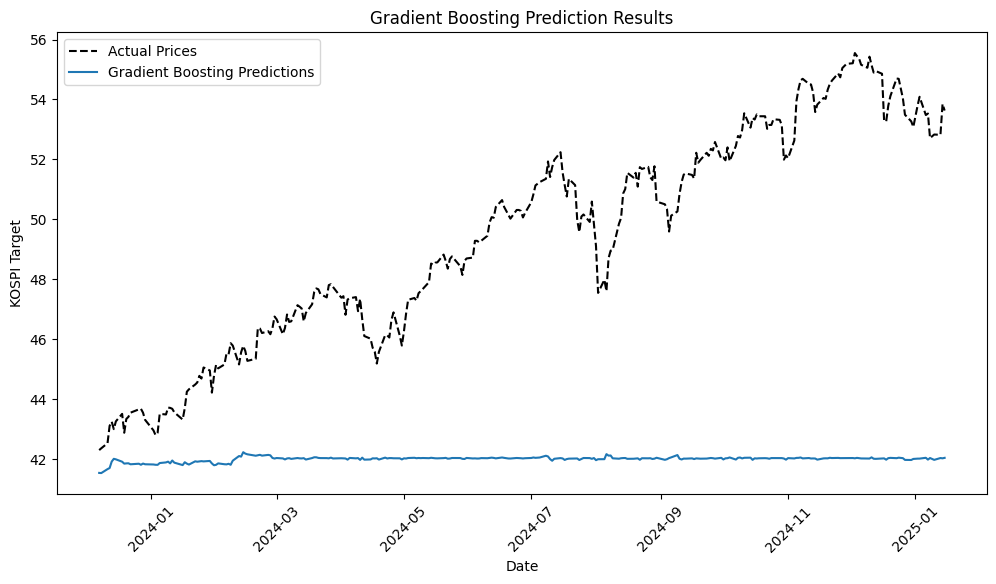

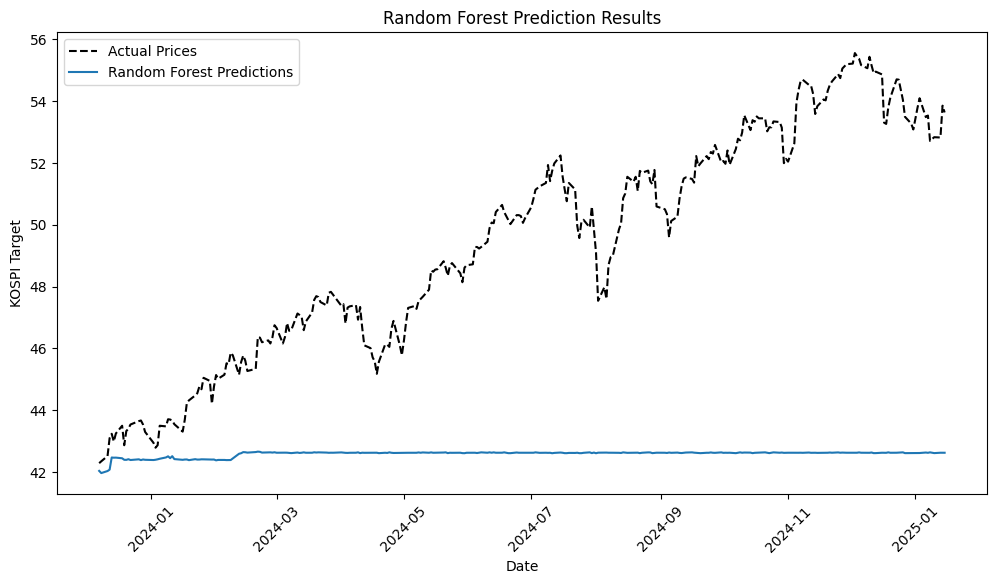

In [74]:
btc_data = pd.read_csv('./data/btc_usd.csv')
kospi_data = pd.read_csv('./data/snpe.csv')

# 데이터 전처리 함수
def preprocess_data(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[price_column] = df[price_column].replace(',', '', regex=True).astype(float)
    df = df.sort_values(date_column)
    df.dropna(subset=[date_column, price_column], inplace=True)
    df['Change'] = df[price_column].pct_change()
    df['MA7'] = df[price_column].rolling(window=7).mean()
    df['MA14'] = df[price_column].rolling(window=14).mean()
    
    # Lag features (과거 3일치 가격 추가)
    for i in range(1, 4):
        df[f'Lag_{i}'] = df[price_column].shift(i)
    
    df.dropna(inplace=True)
    return df

# 데이터 전처리
btc_data = preprocess_data(btc_data, 'Date', 'Price')
kospi_data = preprocess_data(kospi_data, 'Date', 'Price')

btc_data = btc_data[['Date', 'Price', 'Change', 'MA7', 'MA14', 'Lag_1', 'Lag_2', 'Lag_3']].rename(columns={'Price': 'Bitcoin'})
kospi_data = kospi_data[['Date', 'Price', 'Change', 'MA7', 'MA14', 'Lag_1', 'Lag_2', 'Lag_3']].rename(columns={'Price': 'KOSPI'})

# 병합 및 타겟 생성
merged_data = pd.merge(btc_data, kospi_data, on='Date', how='inner')
merged_data['Target'] = merged_data['KOSPI'].shift(-1)
merged_data.dropna(inplace=True)

# 특성 선택
features = ['Bitcoin', 'KOSPI', 'Change_x', 'MA7_x', 'MA14_x', 'Lag_1_x', 'Lag_2_x', 'Lag_3_x', 'Change_y', 'MA7_y', 'MA14_y', 'Lag_1_y', 'Lag_2_y', 'Lag_3_y']
X = merged_data[features]
y = merged_data['Target']

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 분할
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X_scaled, y, merged_data['Date'], test_size=0.2, random_state=42, shuffle=False
)

# 모델 설정
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, subsample=0.8, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'model': model, 'predictions': predictions, 'mse': mse, 'r2': r2}

# 시각화 함수
def plot_predictions_with_time(results, dates, y_test):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(dates, y_test, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(dates, res['predictions'], label=f'{name} Predictions')
        plt.title(f'{name} Prediction Results')
        plt.xlabel('Date')
        plt.ylabel('KOSPI Target')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

# 예측 결과 출력 및 시각화
for name, res in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {res['mse']:.2f}")
    print(f"R^2 Score: {res['r2']:.2f}\n")

plot_predictions_with_time(results, dates_test, y_test)

BTC - Model: Linear Regression
Mean Squared Error: 1842445.23
R^2 Score: 1.00

BTC - Model: Gradient Boosting
Mean Squared Error: 125111897.73
R^2 Score: 0.77

BTC - Model: Random Forest
Mean Squared Error: 96649542.79
R^2 Score: 0.82

SNPE - Model: Linear Regression
Mean Squared Error: 0.17
R^2 Score: 0.99

SNPE - Model: Gradient Boosting
Mean Squared Error: 71.84
R^2 Score: -4.65

SNPE - Model: Random Forest
Mean Squared Error: 63.79
R^2 Score: -4.02



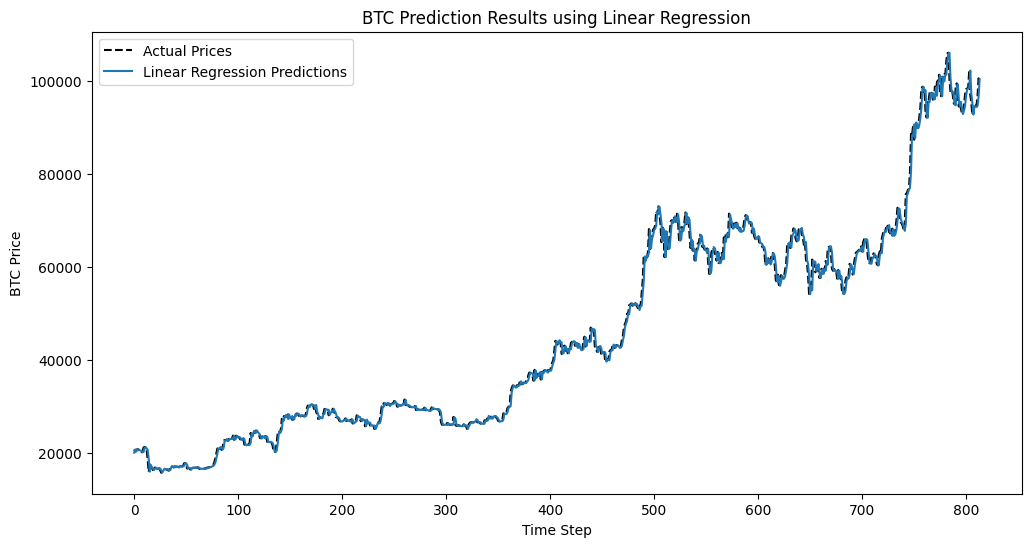

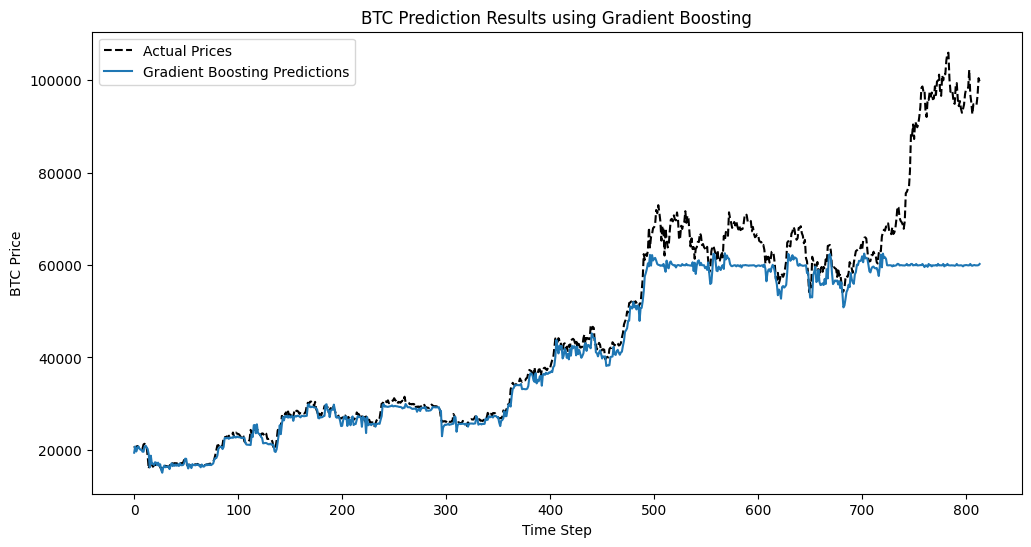

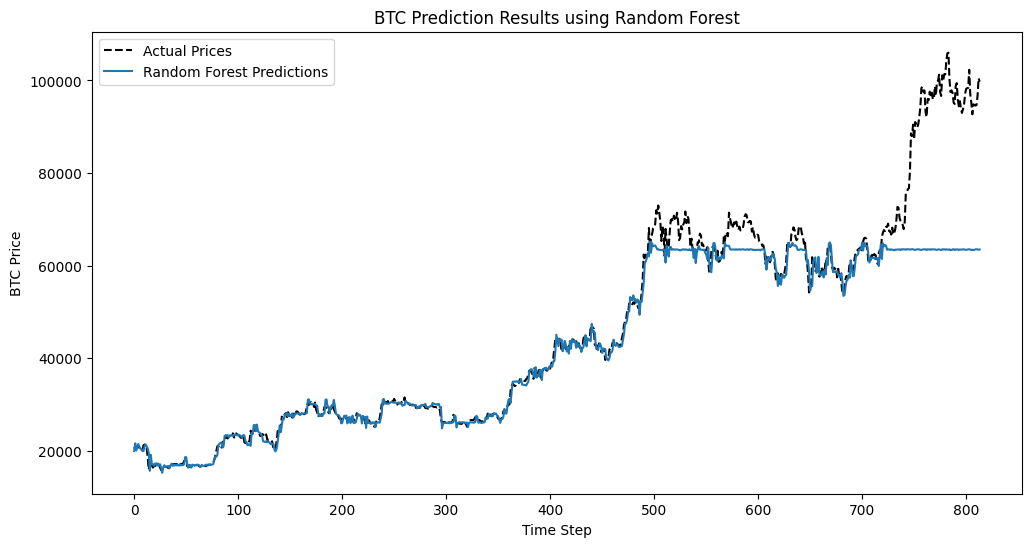

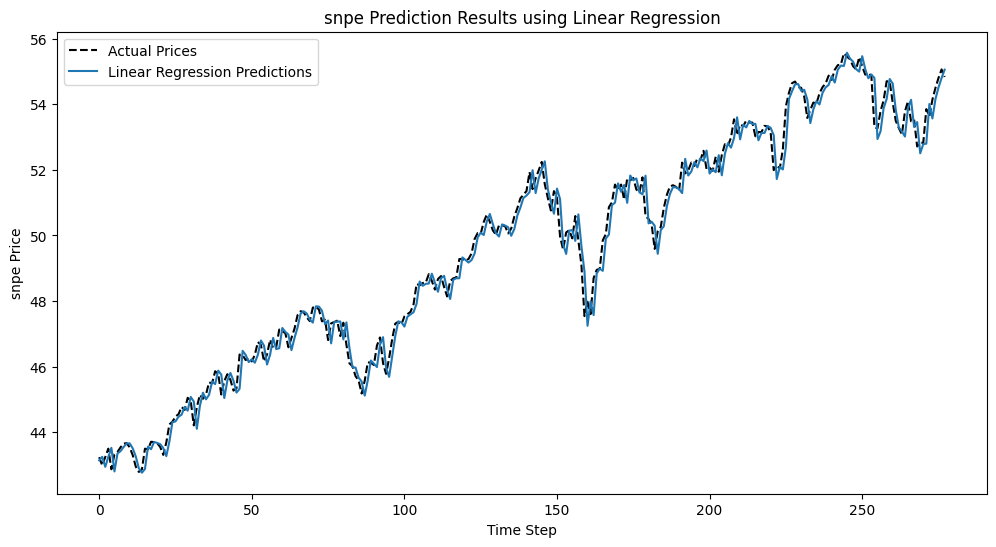

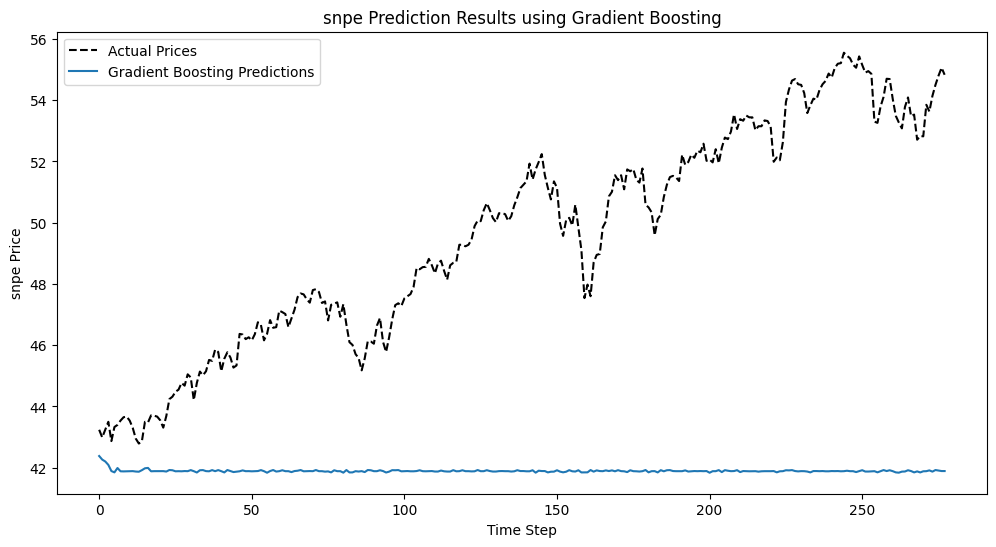

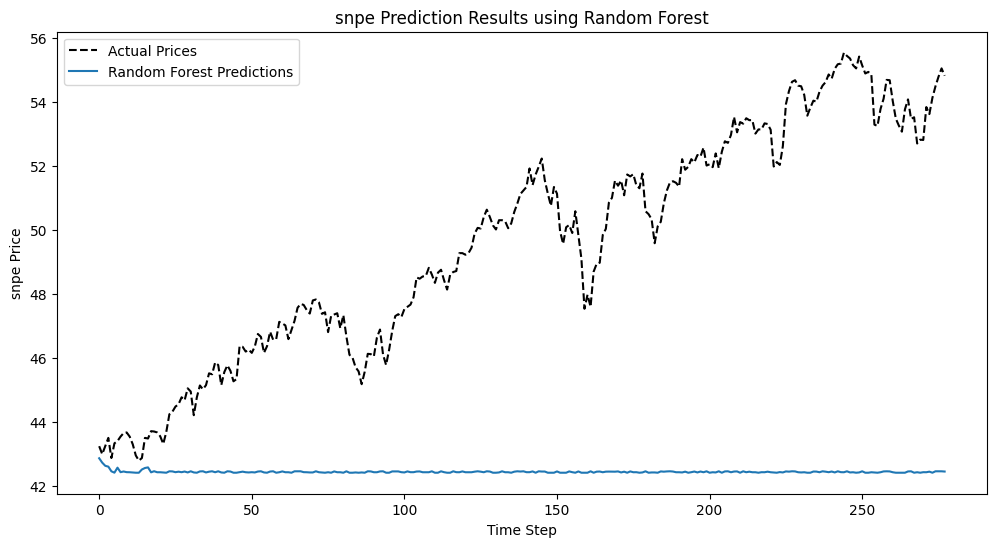

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

btc_data = pd.read_csv('./data/btc_usd.csv')
snpe_data = pd.read_csv('./data/snpe.csv')

# 데이터 전처리 함수
def preprocess_data(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[price_column] = df[price_column].replace(',', '', regex=True).astype(float)
    df = df.sort_values(date_column)
    df.dropna(subset=[date_column, price_column], inplace=True)
    df['Change'] = df[price_column].pct_change()
    df['MA7'] = df[price_column].rolling(window=7).mean()
    df['MA14'] = df[price_column].rolling(window=14).mean()
    
    # Lag features (과거 3일치 가격 추가)
    for i in range(1, 4):
        df[f'Lag_{i}'] = df[price_column].shift(i)
    
    df.dropna(inplace=True)
    return df

# BTC 및 SNPE 데이터 개별 전처리
btc_data = preprocess_data(btc_data, 'Date', 'Price')
snpe_data = preprocess_data(snpe_data, 'Date', 'Price')

# BTC 예측을 위한 데이터셋 준비
btc_features = ['Price', 'Change', 'MA7', 'MA14', 'Lag_1', 'Lag_2', 'Lag_3']
X_btc = btc_data[btc_features]
y_btc = btc_data['Price'].shift(-1).dropna()
X_btc = X_btc.iloc[:-1]  # 타겟 데이터와 개수 맞추기

# KOSPI 예측을 위한 데이터셋 준비
snpe_features = ['Price', 'Change', 'MA7', 'MA14', 'Lag_1', 'Lag_2', 'Lag_3']
X_snpe = snpe_data[snpe_features]
y_snpe = snpe_data['Price'].shift(-1).dropna()
X_snpe = X_snpe.iloc[:-1]  # 타겟 데이터와 개수 맞추기

# 데이터 정규화
scaler_btc = MinMaxScaler()
X_btc_scaled = scaler_btc.fit_transform(X_btc)
scaler_snpe = MinMaxScaler()
X_snpe_scaled = scaler_snpe.fit_transform(X_snpe)

# 학습/테스트 분할
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(
    X_btc_scaled, y_btc, test_size=0.2, random_state=42, shuffle=False
)
X_train_snpe, X_test_snpe, y_train_snpe, y_test_snpe = train_test_split(
    X_snpe_scaled, y_snpe, test_size=0.2, random_state=42, shuffle=False
)

# 모델 설정
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, subsample=0.8, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=5, random_state=42)
}

# 모델 학습 및 평가 함수
def train_and_evaluate(models, X_train, X_test, y_train, y_test, dataset_name):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[name] = {'model': model, 'predictions': predictions, 'mse': mse, 'r2': r2}
        print(f"{dataset_name} - Model: {name}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R^2 Score: {r2:.2f}\n")
    return results

# BTC 및 KOSPI 학습 및 평가
btc_results = train_and_evaluate(models, X_train_btc, X_test_btc, y_train_btc, y_test_btc, 'BTC')
kospi_results = train_and_evaluate(models, X_train_snpe, X_test_snpe, y_train_snpe, y_test_snpe, 'SNPE')

# 시각화 함수
def plot_predictions_with_time(results, y_test, dataset_name):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(range(len(y_test)), res['predictions'], label=f'{name} Predictions')
        plt.title(f'{dataset_name} Prediction Results using {name}')
        plt.xlabel('Time Step')
        plt.ylabel(f'{dataset_name} Price')
        plt.legend()
        plt.show()

# 예측 시각화
plot_predictions_with_time(btc_results, y_test_btc, 'BTC')
plot_predictions_with_time(kospi_results, y_test_snpe, 'snpe')

BTC - Model: Gradient Boosting
Mean Squared Error: 146413594.29
R^2 Score: 0.73

BTC - Model: Random Forest
Mean Squared Error: 94286967.13
R^2 Score: 0.83

SNPE - Model: Gradient Boosting
Mean Squared Error: 77.68
R^2 Score: -5.11

SNPE - Model: Random Forest
Mean Squared Error: 61.98
R^2 Score: -3.88



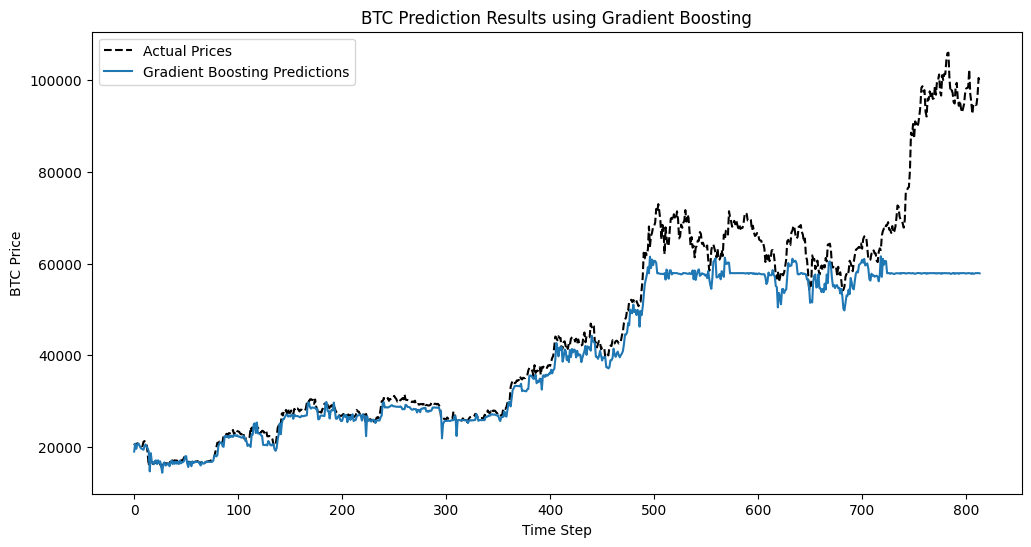

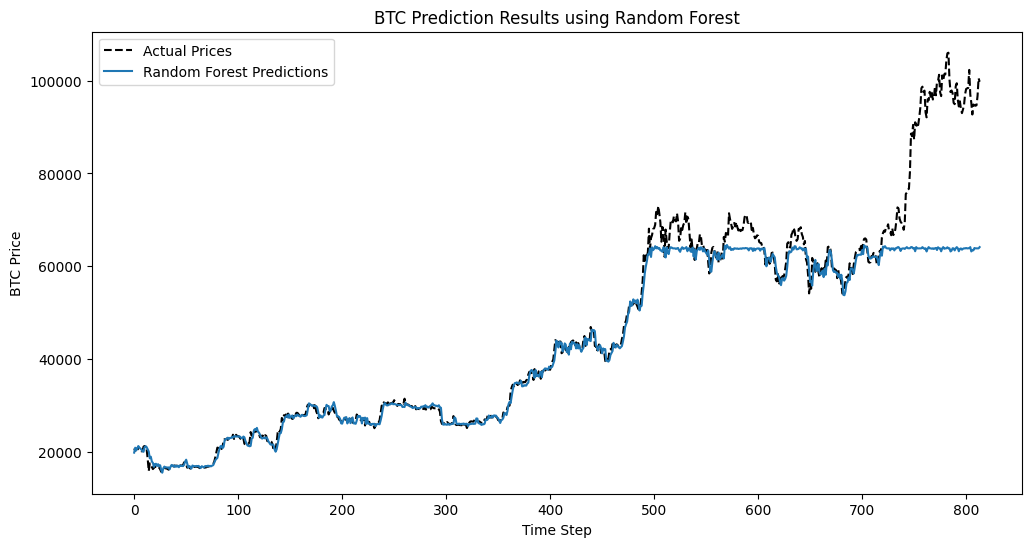

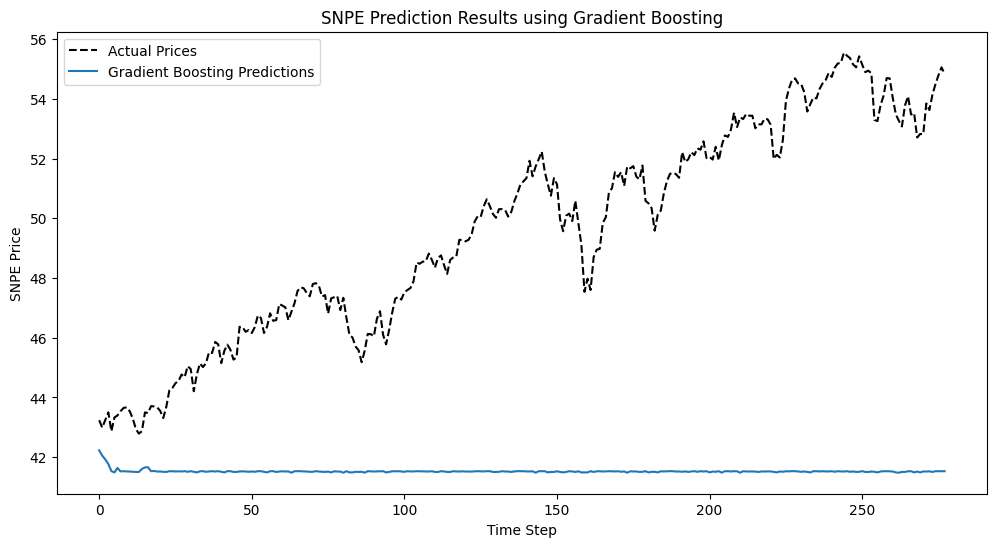

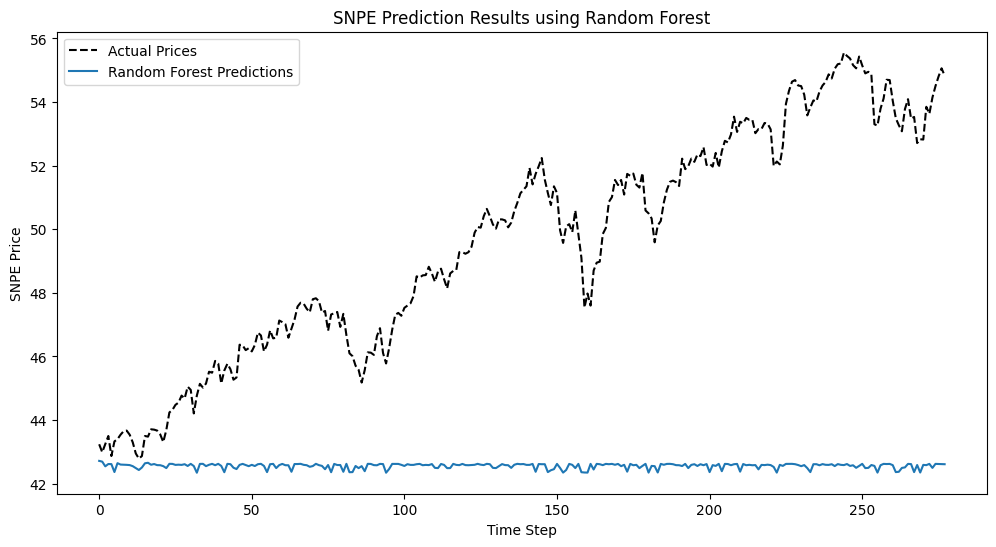

In [82]:
# Gradient, Random forst 하이퍼파라미터 설정 및 개선 시도
models = {
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=500,  # 트리 개수 증가
        learning_rate=0.005,  # 학습률 감소하여 더 세밀하게 학습
        max_depth=8,  # 깊이를 증가시켜 더 복잡한 패턴 학습
        min_samples_split=5,  # 노드 분할을 위한 최소 샘플 개수 증가
        subsample=0.9,  # 일부 데이터를 샘플링하여 일반화 성능 향상
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=500,  # 트리 개수 증가하여 예측 안정성 향상
        max_depth=20,  # 깊이를 증가시켜 복잡한 패턴 학습 가능
        min_samples_split=5,  # 노드 분할을 위한 최소 샘플 개수 증가하여 과적합 방지
        min_samples_leaf=2,  # 리프 노드의 최소 샘플 개수 설정하여 과적합 방지
        max_features='sqrt',  # 각 트리에서 사용할 특성 개수를 제한하여 다양성 증가
        random_state=42
    )
}

# 모델 학습 및 평가 함수
def train_and_evaluate(models, X_train, X_test, y_train, y_test, dataset_name):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        results[name] = {'model': model, 'predictions': predictions, 'mse': mse, 'r2': r2}
        print(f"{dataset_name} - Model: {name}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R^2 Score: {r2:.2f}\n")
    return results

# BTC 및 KOSPI 학습 및 평가
btc_results = train_and_evaluate(models, X_train_btc, X_test_btc, y_train_btc, y_test_btc, 'BTC')
kospi_results = train_and_evaluate(models, X_train_snpe, X_test_snpe, y_train_snpe, y_test_snpe, 'SNPE')

# 시각화 함수
def plot_predictions_with_time(results, y_test, dataset_name):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(range(len(y_test)), res['predictions'], label=f'{name} Predictions')
        plt.title(f'{dataset_name} Prediction Results using {name}')
        plt.xlabel('Time Step')
        plt.ylabel(f'{dataset_name} Price')
        plt.legend()
        plt.show()

# 예측 시각화
plot_predictions_with_time(btc_results, y_test_btc, 'BTC')
plot_predictions_with_time(kospi_results, y_test_snpe, 'SNPE')

# SNPE 개선

SNPE - Model: Linear Regression
Mean Squared Error: 0.18
R^2 Score: 1.00

SNPE - Model: Gradient Boosting
Mean Squared Error: 0.91
R^2 Score: 0.98

SNPE - Model: Random Forest
Mean Squared Error: 0.06
R^2 Score: 1.00



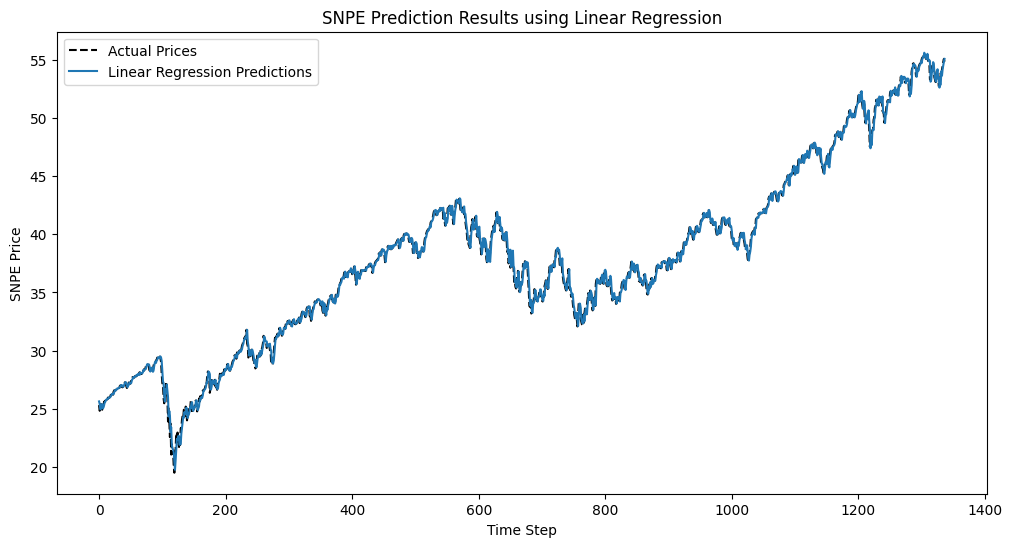

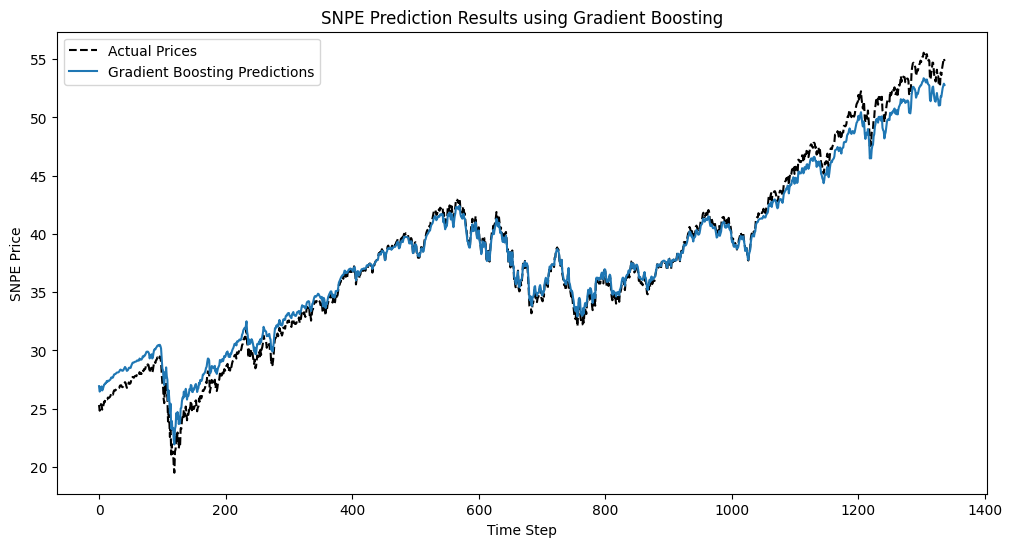

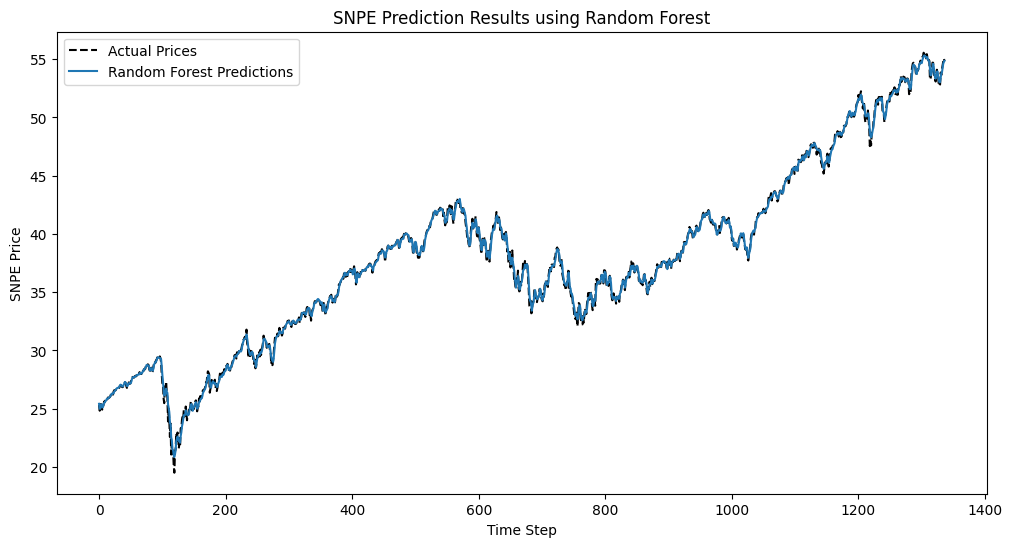

In [86]:
kospi_data = pd.read_csv('./data/snpe.csv')

# 데이터 전처리 함수
def preprocess_data(df, date_column, price_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    df[price_column] = df[price_column].replace(',', '', regex=True).astype(float)
    df = df.sort_values(date_column)
    df.dropna(subset=[date_column, price_column], inplace=True)
    df['Change'] = df[price_column].pct_change()
    df['MA7'] = df[price_column].rolling(window=7).mean()
    df['MA14'] = df[price_column].rolling(window=14).mean()
    df['Volatility'] = df[price_column].rolling(window=7).std()
    df['Momentum'] = df[price_column] - df[price_column].shift(7)
    
    # Lag features (과거 5일치 가격 추가)
    for i in range(1, 6):
        df[f'Lag_{i}'] = df[price_column].shift(i)
    
    df.dropna(inplace=True)
    return df

# SNPE 데이터 개별 전처리
snpe_data = preprocess_data(snpe_data, 'Date', 'Price')

# SNPE 예측을 위한 데이터셋 준비
spne_features = ['Price', 'Change', 'MA7', 'MA14', 'Volatility', 'Momentum', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']
X_snpe = snpe_data[snpe_features]
y_snpe = snpe_data['Price'].shift(-1).dropna()
X_snpe = X_snpe.iloc[:-1]  # 타겟 데이터와 개수 맞추기

# 데이터 정규화
scaler_snpe = MinMaxScaler()
X_snpe_scaled = scaler_snpe.fit_transform(X_snpe)

# 전체 데이터를 학습
X_train_snpe, X_test_snpe, y_train_snpe, y_test_snpe = X_snpe_scaled, X_snpe_scaled, y_snpe, y_snpe

# 모델 설정
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=700,  # 트리 개수 증가
        learning_rate=0.003,  # 학습률 감소하여 더 세밀하게 학습
        max_depth=10,  # 깊이를 증가시켜 더 복잡한 패턴 학습
        min_samples_split=4,  # 노드 분할을 위한 최소 샘플 개수 증가
        subsample=0.85,  # 일부 데이터를 샘플링하여 일반화 성능 향상
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=700,  # 트리 개수 증가하여 예측 안정성 향상
        max_depth=25,  # 깊이를 증가시켜 복잡한 패턴 학습 가능
        min_samples_split=4,  # 노드 분할을 위한 최소 샘플 개수 증가하여 과적합 방지
        min_samples_leaf=2,  # 리프 노드의 최소 샘플 개수 설정하여 과적합 방지
        max_features='sqrt',  # 각 트리에서 사용할 특성 개수를 제한하여 다양성 증가
        random_state=42
    )
}

# 모델 학습 및 평가 함수
def train_and_evaluate(models, X_train, y_train, dataset_name):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_train)
        mse = mean_squared_error(y_train, predictions)
        r2 = r2_score(y_train, predictions)
        results[name] = {'model': model, 'predictions': predictions, 'mse': mse, 'r2': r2}
        print(f"{dataset_name} - Model: {name}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R^2 Score: {r2:.2f}\n")
    return results

# KOSPI 학습 및 평가
snpe_results = train_and_evaluate(models, X_train_snpe, y_train_snpe, 'SNPE')

# 시각화 함수
def plot_predictions_with_time(results, y_train, dataset_name):
    for name, res in results.items():
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(y_train)), y_train, label='Actual Prices', color='black', linestyle='dashed')
        plt.plot(range(len(y_train)), res['predictions'], label=f'{name} Predictions')
        plt.title(f'{dataset_name} Prediction Results using {name}')
        plt.xlabel('Time Step')
        plt.ylabel(f'{dataset_name} Price')
        plt.legend()
        plt.show()

# 예측 시각화
plot_predictions_with_time(snpe_results, y_train_snpe, 'SNPE')

### 데이터 양이 적어서 예측이 어려운가?
- 데이터가 충분히 많다면 모델이 패턴을 학습할 수 있습니다.
- 그러나 데이터 양이 부족할 경우, 트리 기반 모델(Random Forest, Gradient Boosting)이 충분한 규칙을 학습하지 못하고, 단순한 평균값으로 수렴할 가능성이 큽니다.
- 특히, 시계열 데이터는 일반적인 회귀 모델보다 과거 데이터의 패턴을 학습하는 것이 중요하기 때문에, 데이터가 적으면 학습이 어려워집니다.

- 데이터 부족으로 발생하는 문제
- Gradient Boosting: 샘플이 적을 경우 오버피팅되거나 특정 값으로 수렴 가능.
- Random Forest: 데이터가 적으면 개별 트리들이 충분한 패턴을 학습하지 못하고 평균적인 예측을 수행.
- Linear Regression: 학습 데이터가 부족하면 단순한 선형 관계만 학습하여 변동성을 반영하지 못함.

결론: 데이터 양이 충분하지 않으면 모델이 KOSPI 가격 패턴을 제대로 학습하지 못할 가능성이 높음.